# Script 2: retail spectrum

This script retails a fits spectrum introducing the initial and final lambda.


In [1]:
from PyAstronomy import pyasl
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

Reading spectra module. Requires the path where the spectra are located.

In [2]:
def readSpec(filename, path):
    
    sp = fits.open(path + filename)
    header = sp[0].header
      
    tf = sp[0].data
    tf = tf.flatten()
 
    wvl, flx = pyasl.read1dFitsSpec(path + filename)
 
    sp.close()

    date_obs = header['DATE']

    return header, wvl, flx, date_obs, tf

Now we define the function that will trim the spectrum to our liking. Receives the wavelength array that covers the entire spectrum, ask fot the desired lambda range, and returns the selected flux and wavelength.

In this version it is not normalized: the position of the lambda entered in the "wavelength" array is located using the NumPy function "argmin" and new already trimmed arrays are generated. In this way the original data is not altered.

In [3]:
def retailSpec(wavelength, flux):  
    
    print("Select interval between " + str(wavelength[0]) + " A and " +str(wavelength[-1]) + " A:")
    waveini = float(input("Enter spectrum waveini (A):"))
    waveend = float(input("Enter spectrum waveend (A):"))
    
    tidx = np.argmin(np.abs(waveini - wavelength))
    tfdx = np.argmin(np.abs(waveend - wavelength))
    
    print("dim wave: " + str(len(wavelength)))
    print("Valor " + str(tidx) + ", " + str(tfdx))
    
    wavelength_r = wavelength[tidx:tfdx]
    flux_r = flux[tidx:tfdx]
    
    return wavelength_r, flux_r
    

Function used to save spectra. Some fits headers are modified.

In [4]:
def saveSpec(filename, header, wave, flux, date_obs):
    print("Fecha obs:")
    print(date_obs)
     
    header['CRVAL1'] = wave[0]
    header['DATE'] = date_obs
    hdu = fits.PrimaryHDU(flux, header)
    hdu.writeto(filename, overwrite=True)      
   

Function to plot spectra. We can change the size modifying the 'figsize' value.

In [5]:
def plotSpectrum(wavelength, flux):
   
    fig= plt.figure(figsize=(15,5))
    axes= fig.add_axes([0.1,0.1,0.8,0.8])
    axes.plot(wavelength, flux)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.show()

Function to calculate spectral resolution.

In [6]:
def resolution(header, wavelength):
    
    waveini = wavelength[0]
    waveend = wavelength[-1]
    res = np.abs(waveini - waveend)/len(wavelength)
    print("Waveini: " + str(waveini))
    print("Waveend: " + str(waveend))
    print("Resolution calculated: " + str(res) + " A")
    print("Resolution header: " + str(header['CDELT1']) + " A")
    print("Dimension array: " + str(len(wavelength))) 
    print(wavelength)
    
    return res            

### Core script.

Main variables and call to all the functions.

Enter spectrum to analyze:ref25000
All data
Waveini: 3000.0
Waveend: 9999.99
Resolution calculated: 0.009999985714285713 A
Resolution header: 0.01 A
Dimension array: 700000
[3000.   3000.01 3000.02 ... 9999.97 9999.98 9999.99]


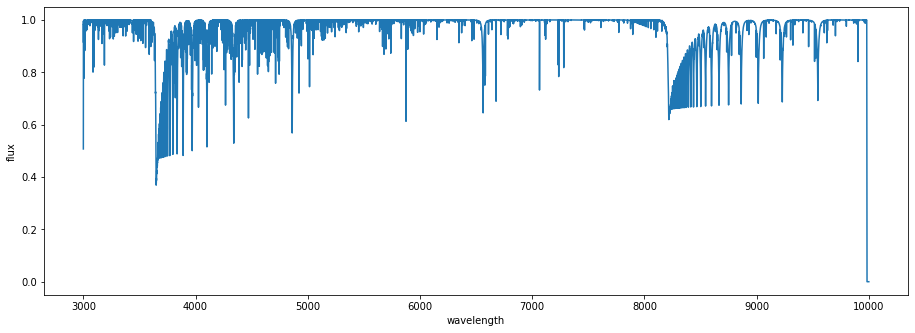

Select interval between 3000.0 A and 9999.99 A:
Enter spectrum waveini (A):3900
Enter spectrum waveend (A):5000
dim wave: 700000
Valor 90000, 200000
Waveini: 3900.0
Waveend: 4999.99
Resolution calculated: 0.009999909090909089 A
Resolution header: 0.01 A
Dimension array: 110000
[3900.   3900.01 3900.02 ... 4999.97 4999.98 4999.99]


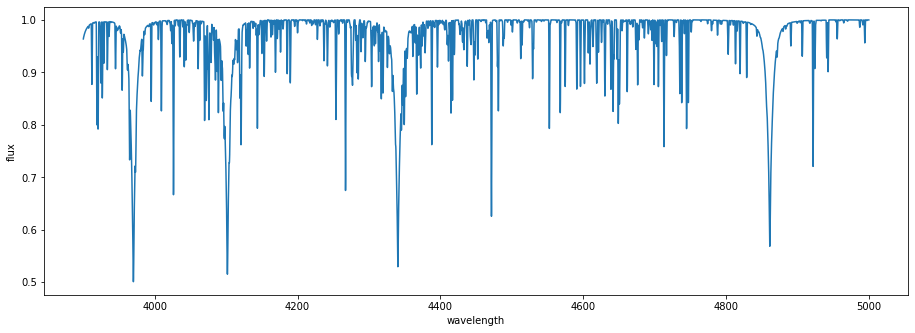

Save retailed spectrum (y/N)?y
Enter spectrum name:ref25000_r
Fecha obs:
2004-03-11T09:10:05
End Data


In [7]:
path = "/home/fran/PythonProjects/TFM/"

fileSpectrum = input ("Enter spectrum to analyze:")
fileSpectrum += ".fits"

#Reading spectrum
header, wavelength, flux, date_obs, tf = readSpec(fileSpectrum, path)
print("All data")

#Plotting spectrum
resolution(header, wavelength)
plotSpectrum(wavelength, flux)

#Retail spectrum
wavelength2, flux2 = retailSpec(wavelength, flux)
resolution(header, wavelength2)
plotSpectrum(wavelength2, flux2)


#Saving spectrum
saveData = input("Save retailed spectrum (y/N)?")
if saveData =="y":    
    fileSpectrum = input("Enter spectrum name:")
    fileSpectrum +=".fits"
    saveSpec(fileSpectrum, header, wavelength2, flux2, date_obs)

print("End Data")
